In [1]:
from imports import *
from functions import *
from database import *

In [2]:
path = r"C:\Users\f.gionnane\Documents\Ocean ETL Data Analysis\csv\Cleaned_Data_Ocean_Meteo_2025-04-23_10h19.csv"

df_EDA = pd.read_csv(path)

In [3]:
df_EDA.dtypes

Datetime                        object
Lat                            float64
Lon                            float64
Wind Direction (°)             float64
Wind Gusts (km/h)              float64
Wave Height (m)                float64
Average Wave Period (s)        float64
Dominant Wave Direction (°)    float64
Water T° (°C)                  float64
Water Depth (m)                float64
Station ID                       int64
Station Zone                    object
Sea Temperature Depth (m)      float64
Barometer Elevation (m)        float64
Air T° Height (m)              float64
T°(C°)                         float64
Relative Humidity (%)          float64
Dew Point (°C)                 float64
Precipitations (mm)            float64
Sea Level Pressure (hPa)       float64
Cloud Cover (%)                float64
Low Clouds (%)                 float64
Middle Clouds (%)              float64
High Clouds (%)                float64
Visibility (km)                float64
Wind Speed (10m)         

In [4]:
# convertir les colonnes numériques en float
columns_to_convert =[
    "Relative Humidity (%)",                  
    "Precipitations (mm)",                    
    "Sea Level Pressure (hPa)",               
    "Low Clouds (%)",                         
    "Middle Clouds (%)",                      
    "High Clouds (%)",                        
    "Visibility (km)",                        
    "Wind Speed (10m)",                       
]
#convertir ces colonnes avec le astype float
df_EDA[columns_to_convert] = df_EDA[columns_to_convert].apply(pd.to_numeric, errors='coerce')

col_for_str=["Air T° Height (m)", "Sea Temperature Depth (m)", "Barometer Elevation (m)"]
# convertir ces colonnes avec astype str
for col in col_for_str:
    df_EDA[col] = df_EDA[col].astype(str)
    
df_EDA.dtypes

Datetime                        object
Lat                            float64
Lon                            float64
Wind Direction (°)             float64
Wind Gusts (km/h)              float64
Wave Height (m)                float64
Average Wave Period (s)        float64
Dominant Wave Direction (°)    float64
Water T° (°C)                  float64
Water Depth (m)                float64
Station ID                       int64
Station Zone                    object
Sea Temperature Depth (m)       object
Barometer Elevation (m)         object
Air T° Height (m)               object
T°(C°)                         float64
Relative Humidity (%)          float64
Dew Point (°C)                 float64
Precipitations (mm)            float64
Sea Level Pressure (hPa)       float64
Cloud Cover (%)                float64
Low Clouds (%)                 float64
Middle Clouds (%)              float64
High Clouds (%)                float64
Visibility (km)                float64
Wind Speed (10m)         

In [5]:
df_EDA.head()

,Datetime,Lat,Lon,Wind Direction (°),Wind Gusts (km/h),Wave Height (m),Average Wave Period (s),Dominant Wave Direction (°),Water T° (°C),Water Depth (m),...,Middle Clouds (%),High Clouds (%),Visibility (km),Wind Speed (10m),Year,Month,DayOfWeek,DayPeriod,Date ID,Unique ID
0,2025-04-23 07:00:00,32.5,-79.1,200.0,4.0,1.1,4.9,131.0,21.4,35.0,...,82.0,100.0,13.3,14.92,2025,April,Wednesday,Morning,2025042307,20250423070041004
1,2025-04-23 06:00:00,32.5,-79.1,190.0,5.0,1.1,4.9,131.0,21.3,35.0,...,13.0,11.0,13.3,13.68,2025,April,Wednesday,Morning,2025042306,20250423060041004
2,2025-04-23 05:00:00,32.5,-79.1,200.0,3.0,1.1,4.9,131.0,21.2,35.0,...,9.0,91.0,12.6,11.17,2025,April,Wednesday,Night,2025042305,20250423050041004
3,2025-04-23 04:00:00,32.5,-79.1,190.0,3.0,1.1,4.9,131.0,21.2,35.0,...,99.0,99.0,12.7,10.83,2025,April,Wednesday,Night,2025042304,20250423040041004
4,2025-04-23 03:00:00,32.5,-79.1,170.0,3.0,1.1,4.9,131.0,21.2,35.0,...,10.0,76.0,12.4,7.42,2025,April,Wednesday,Night,2025042303,20250423030041004


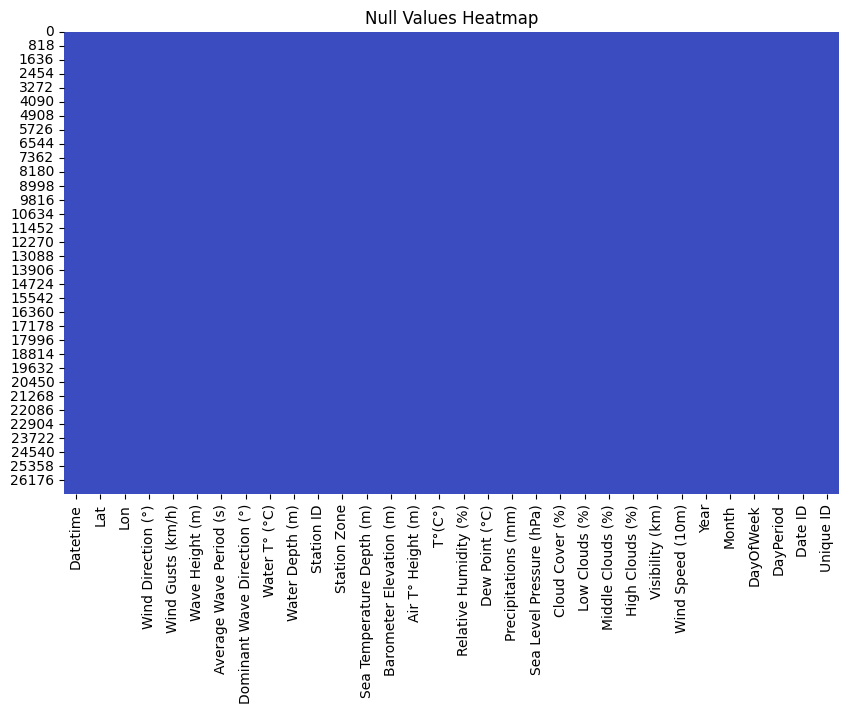

In [22]:
# null values heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(df_EDA.isnull(), cbar=False, cmap='coolwarm')

plt.title('Null Values Heatmap')

plt.show()

In [7]:
# Chercher les colonnes numériques et catégorielles
numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns
categorical_columns = df_EDA.select_dtypes(include=[object]).columns

print(f"\nNumerical Columns:\n{numerical_columns}")
print(f"\nCategorical Columns:\n{categorical_columns}")


Numerical Columns:
Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Date ID', 'Unique ID'],
      dtype='object')

Categorical Columns:
Index(['Datetime', 'Station Zone', 'Sea Temperature Depth (m)',
       'Barometer Elevation (m)', 'Air T° Height (m)', 'Month', 'DayOfWeek',
       'DayPeriod'],
      dtype='object')


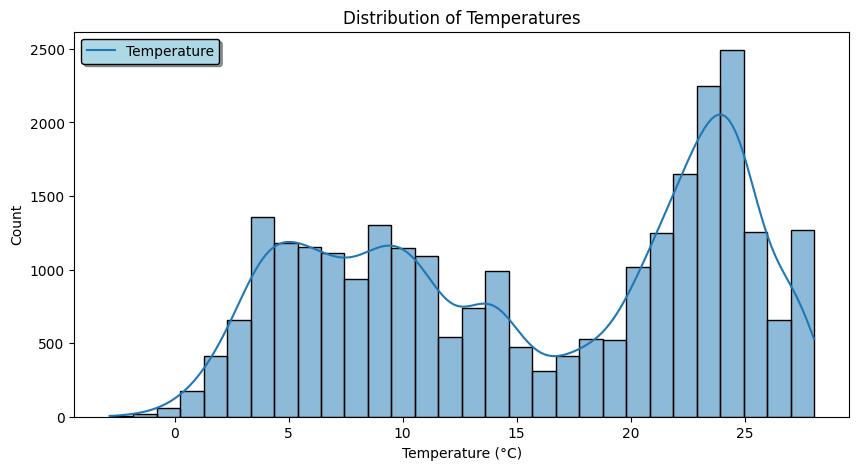

In [8]:
# analyse de la distribution des températures
plt.figure(figsize=(10, 5))

sns.histplot(df_EDA['T°(C°)'], kde=True, bins=30)

plt.title("Distribution of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend(
    labels=['Temperature'],
    loc='best',
    shadow=True,
    facecolor='lightblue',
    edgecolor='black'    
)

plt.show()

Text(0.5, 1.0, 'Distribution of Wind Speeds')

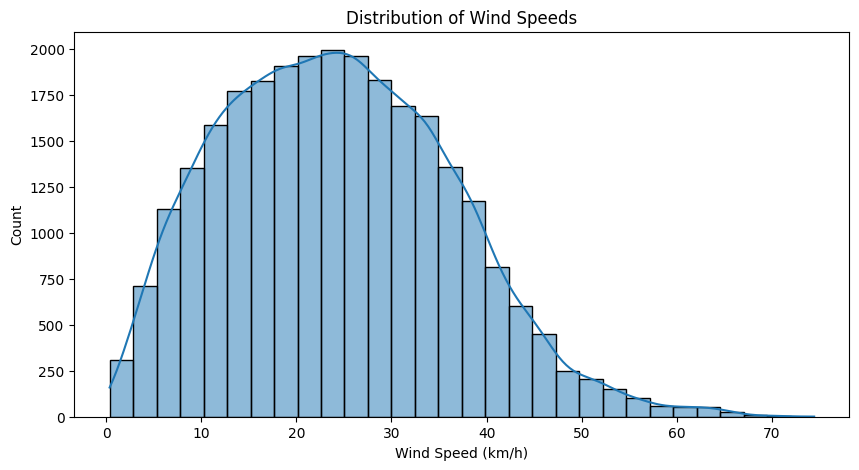

In [9]:
#analyse de la distribution de la vitesse du vent
plt.figure(figsize=(10, 5))

sns.histplot(df_EDA['Wind Speed (10m)'], kde=True, bins=30)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Count")
plt.title("Distribution of Wind Speeds")

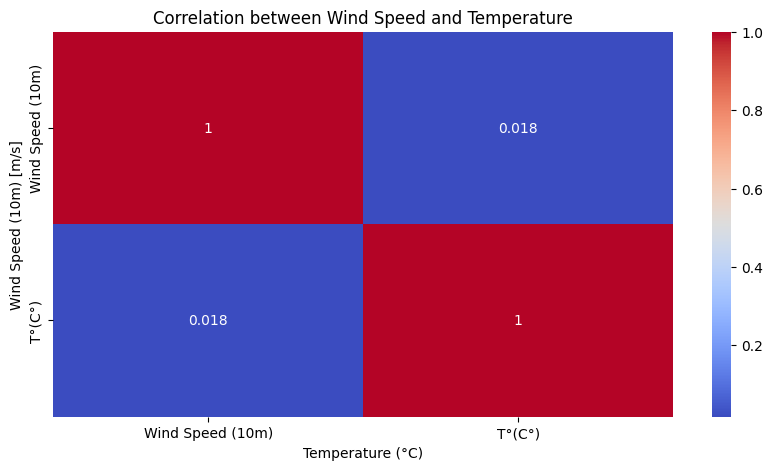

In [10]:
# Analyse de la relation entre la température et la vitesse du vent

corr_data = df_EDA[['Wind Speed (10m)', 'T°(C°)']].corr()

# Création de la heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (10m) [m/s]")
plt.title("Correlation between Wind Speed and Temperature")

# Afficher le graphique
plt.show()

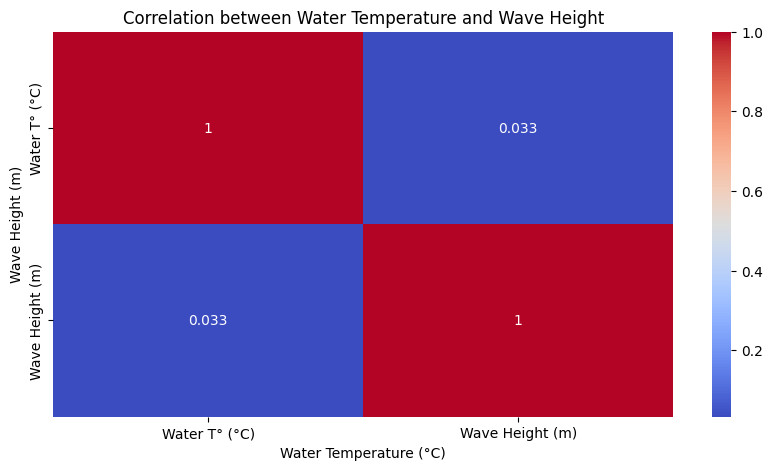

In [11]:
# Corrélation T° eau et hauteur des vagues
corr_data = df_EDA[['Water T° (°C)', 'Wave Height (m)']].corr()

# Création de la heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes
plt.xlabel("Water Temperature (°C)")
plt.ylabel("Wave Height (m)")
plt.title("Correlation between Water Temperature and Wave Height")

# Afficher le graphique
plt.show()

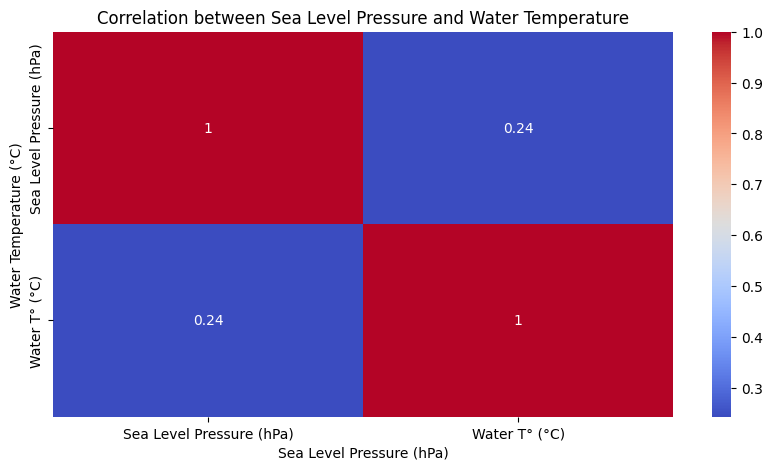

In [12]:
# correlation entre la pression MSL et la température de l'eau

corr_data = df_EDA[['Sea Level Pressure (hPa)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Sea Level Pressure (hPa)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Sea Level Pressure and Water Temperature")

# Afficher le graphique

plt.show()

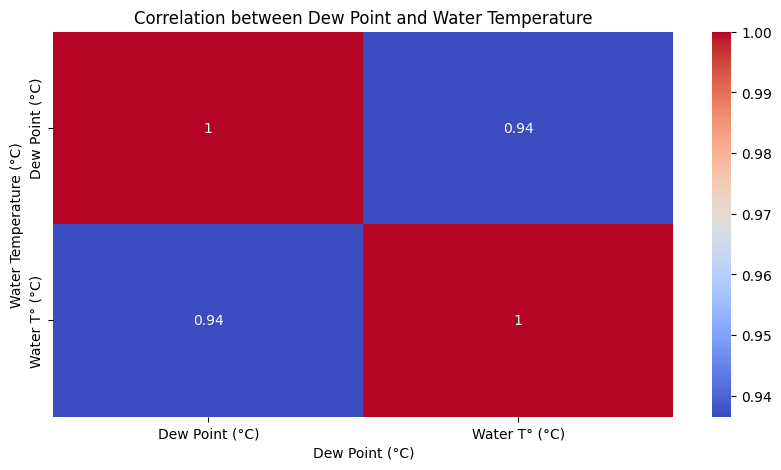

In [13]:
# correlation between Dew Point (°C) and water Temperature (°C)

corr_data = df_EDA[['Dew Point (°C)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Dew Point (°C)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Dew Point and Water Temperature")

# Afficher le graphique

plt.show()


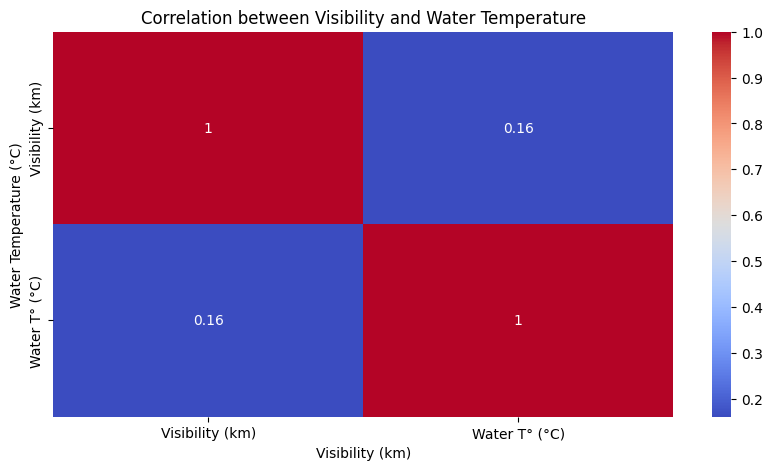

In [14]:
# correlation entre visibilité et la température de l'eau

corr_data = df_EDA[['Visibility (km)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Visibility (km)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Visibility and Water Temperature")

# Afficher le graphique

plt.show()

In [15]:
#revoir les colonnes numériques
df_numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns

print(df_numerical_columns)

Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Date ID', 'Unique ID'],
      dtype='object')


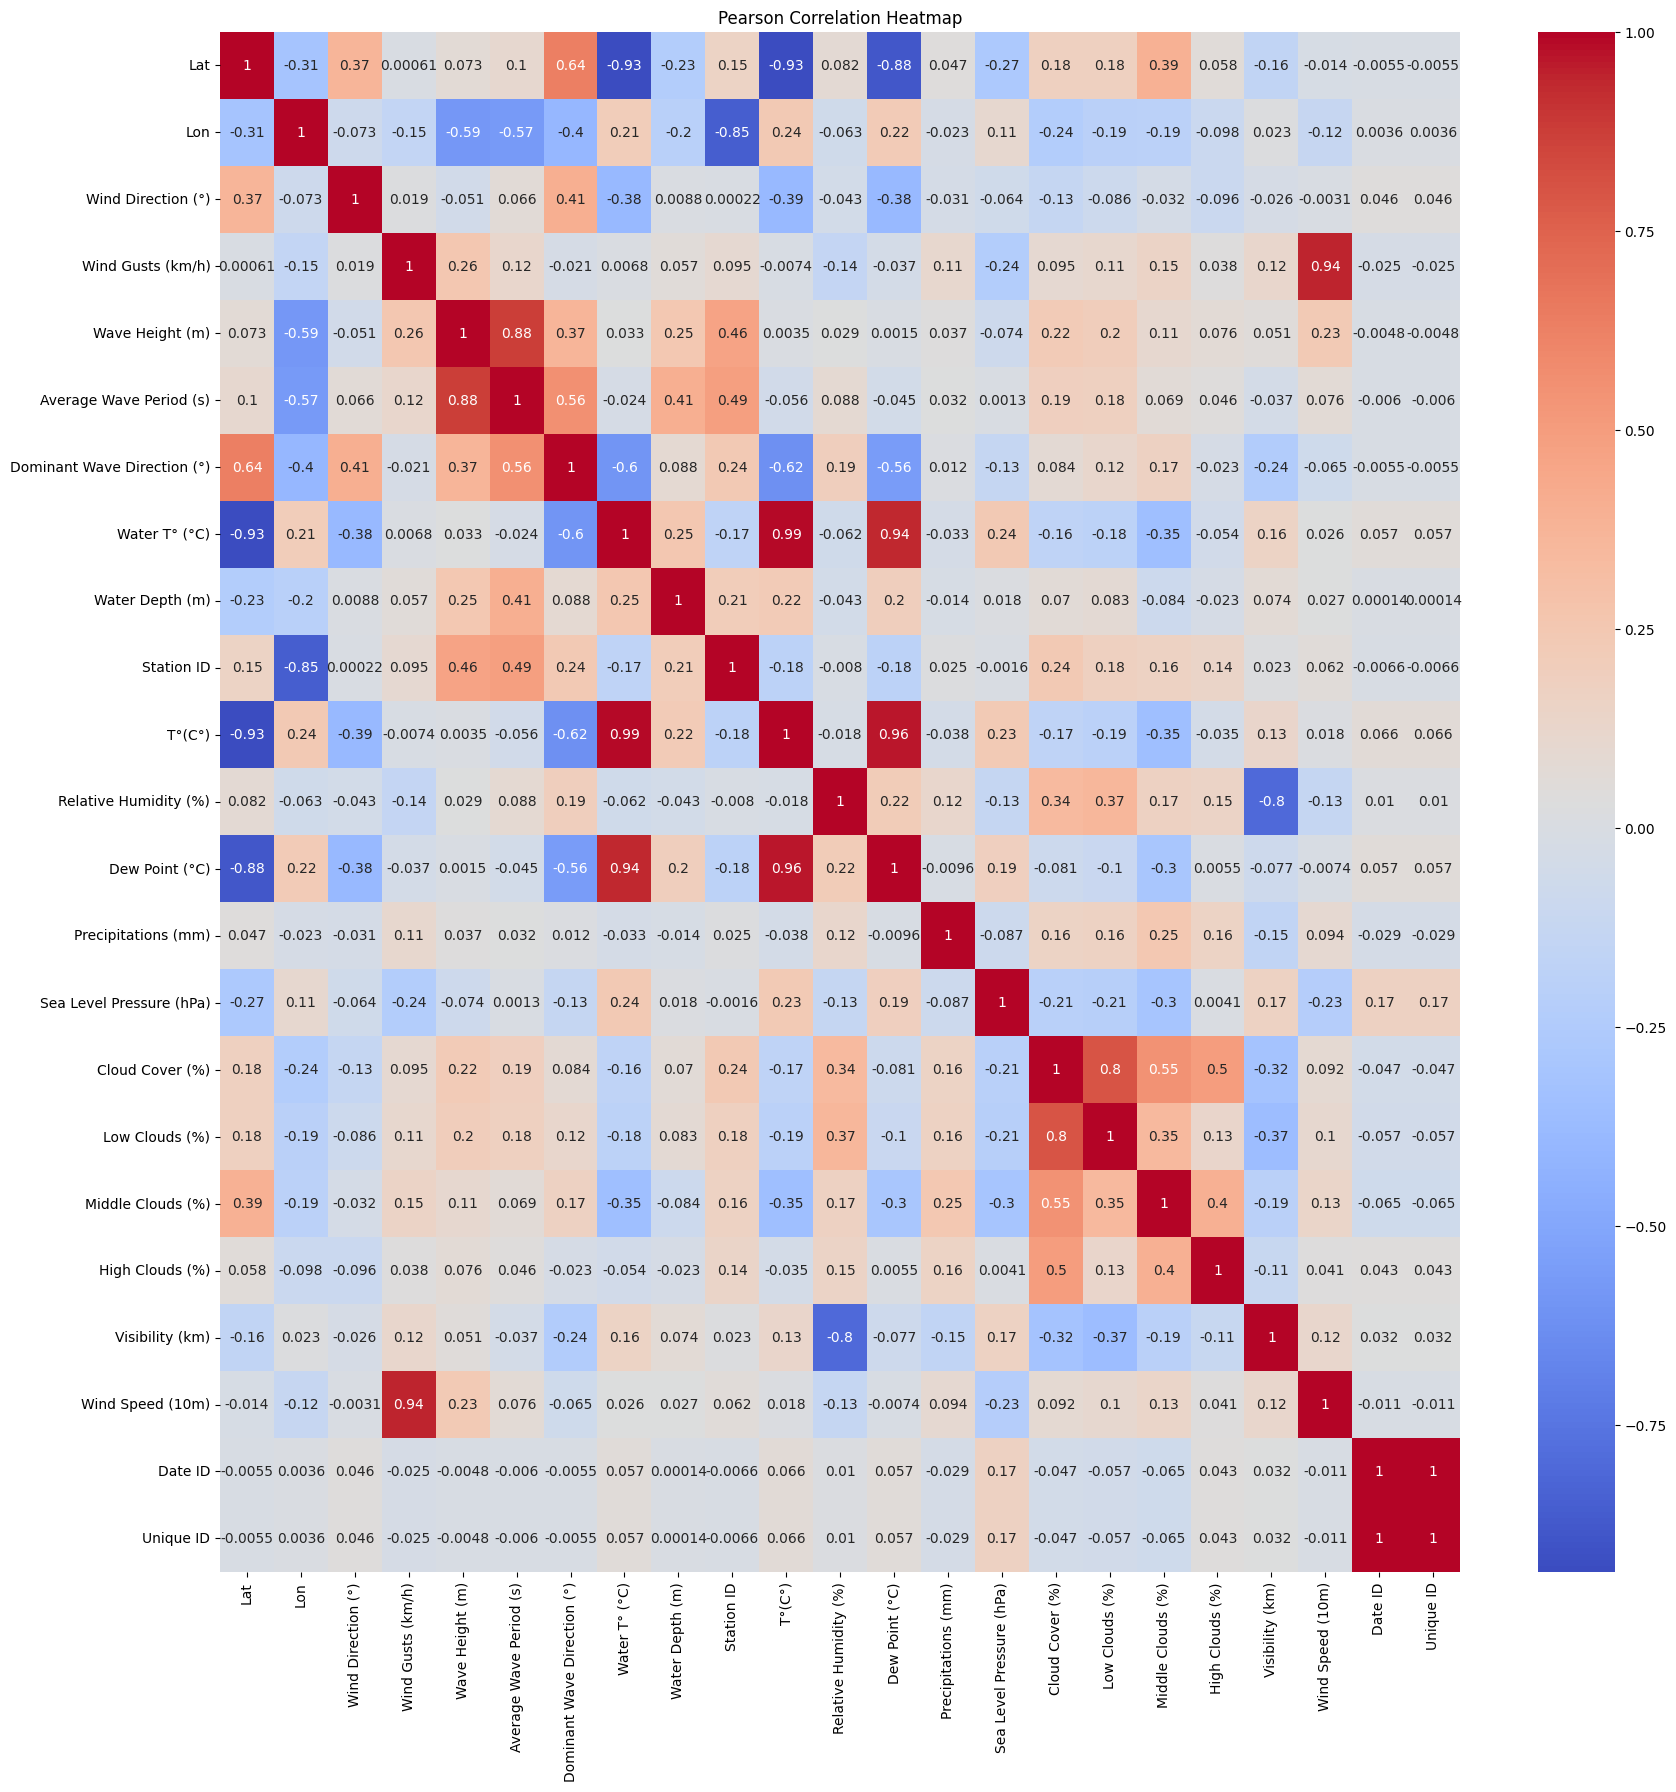

In [16]:
plt.figure(figsize=(20, 20))
df_numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns
# KICK the year column

df_numerical_columns = df_numerical_columns[df_numerical_columns != 'Year']

corr_data = df_EDA[df_numerical_columns].corr(method='pearson')

sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

plt.title("Pearson Correlation Heatmap")
plt.show()


In [17]:
"""
'Wind Direction (°)', 'Wind Gusts (km/h)', 'Wave Height (m)',
'Average Wave Period (s)', 'Dominant Wave Direction (°)',
'Water T° (°C)', 'Lat', 'Lon', 'Water Depth (m)',
'Sea Temperature Depth (m)', 'Barometer Elevation (m)',
'Air T° Height (m)', 'T°(C°)', 'Relative Humidity (%)',
'Dew Point (°C)', 'Precipitations (mm)', 'Sea Level Pressure (hPa)',
'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Day', 'Hour', 'Month'


"""
"""
### 1. **Prédiction de la température de l'air (T°(C°))**
   - **Modèle recommandé** : **XGBoost** ou **LightGBM**
   - **Raison** : Ces modèles de **gradient boosting** 
   sont robustes face aux relations non linéaires et aux interactions complexes 
   entre les variables. Ils sont souvent plus performants que les modèles 
   linéaires lorsque les données sont complexes.

### 2. **Classification des conditions météorologiques (Ciel clair, nuageux, pluvieux, etc.)**
   - **Modèle recommandé** : **Random Forest** ou **XGBoost**
   - **Raison** : Les **Random Forest** et **XGBoost** sont puissants pour 
   gérer des jeux de données avec des relations non linéaires et beaucoup 
   de variables d'entrée. Ils offrent aussi une interprétabilité relative 
   via l'importance des variables.

### 3. **Prédiction de la hauteur des vagues (Wave Height)**
   - **Modèle recommandé** : **Random Forest** ou **Gradient Boosting Machines 
   (GBM)**
   - **Raison** : **Random Forest** est robuste aux relations non linéaires, 
   et **GBM** est très performant pour la régression quand il y a des relations 
   complexes à modéliser.

### 4. **Prédiction de la vitesse du vent (Wind Speed)**
   - **Modèle recommandé** : **XGBoost** ou **LSTM (Long Short-Term Memory)** 
   si les données sont temporelles
   - **Raison** : **XGBoost** est efficace pour des relations complexes et des 
   données avec beaucoup d'interactions. Si les données sont structurées dans 
   le temps (ex : séries chronologiques), un **LSTM** peut capturer les 
   dépendances temporelles.

### 5. **Prédiction des précipitations (Precipitations)**
   - **Modèle recommandé** : **XGBoost** ou **LightGBM**
   - **Raison** : **XGBoost** et **LightGBM** sont deux des meilleurs modèles 
   pour des prédictions de régression sur des données avec des relations non 
   linéaires. Ces modèles gèrent bien les variables complexes et sont très 
   performants.

### 6. **Détection de la tendance des vagues (en hausse ou en baisse)**
   - **Modèle recommandé** : **Random Forest** ou **SVM (Support Vector Machines)**
   - **Raison** : Pour un problème de classification binaire, 
   **Random Forest** peut bien capturer des tendances complexes et **SVM** 
   est efficace avec des données non linéaires.

### 7. **Estimation de la pression au niveau de la mer (Sea Level Pressure)**
   - **Modèle recommandé** : **Gradient Boosting Machines (GBM)** ou **Random 
   Forest**
   - **Raison** : **GBM** et **Random Forest** sont très bien adaptés à des 
   données avec des relations complexes et peuvent capturer des interactions 
   complexes entre les variables.

### 8. **Prédiction de la visibilité (Visibility)**
   - **Modèle recommandé** : **K-Nearest Neighbors (KNN)** ou **Random Forest**
   - **Raison** : **KNN** peut être un bon choix si les prédictions dépendent 
   beaucoup des valeurs locales (proximité des points de données). **Random Forest** 
   est plus robuste aux interactions complexes entre les variables.

### 9. **Estimation de la température de l'eau (Water T°) en fonction de la 
# profondeur (Water Depth)**
   - **Modèle recommandé** : **Random Forest** ou **SVR (Support Vector 
   Regression)**
   - **Raison** : **Random Forest** peut bien gérer des relations non 
   linéaires entre la température et la profondeur. **SVR** est également 
   efficace pour la régression sur des relations complexes non linéaires.

### 10. **Prévision de la direction du vent (Wind Direction)**
   - **Modèle recommandé** : **Circular Regression** (via Sine/Cosine 
   transformations) ou **Random Forest**
   - **Raison** : La direction du vent est une variable circulaire. 
   La **Circular Regression** permet de traiter des données circulaires, 
   en transformant la direction en variables **sinus et cosinus**. 
   Sinon, **Random Forest** peut être utilisé après transformation des données.

### Modèles supplémentaires pour des données avec relations non linéaires :
- **XGBoost**, **LightGBM** et **CatBoost** sont tous très performants pour 
modéliser des relations complexes avec des interactions non linéaires.
- **Random Forest** est également un excellent choix pour des données avec 
des interactions non linéaires, tout en étant facile à implémenter et robuste 
aux données bruitées.

### Résumé :
Ces modèles sont tous capables de capturer des relations **non linéaires** 
et **complexes** entre les variables, ce qui est particulièrement utile 
lorsque les corrélations de Pearson sont faibles. **XGBoost**, **Random 
Forest**, et **Gradient Boosting** sont particulièrement puissants pour 
ce type de données. Si tu travailles avec des séries temporelles, **LSTM** 
peut aussi être une excellente option.

"""

"\n### 1. **Prédiction de la température de l'air (T°(C°))**\n   - **Modèle recommandé** : **XGBoost** ou **LightGBM**\n   - **Raison** : Ces modèles de **gradient boosting** \n   sont robustes face aux relations non linéaires et aux interactions complexes \n   entre les variables. Ils sont souvent plus performants que les modèles \n   linéaires lorsque les données sont complexes.\n\n### 2. **Classification des conditions météorologiques (Ciel clair, nuageux, pluvieux, etc.)**\n   - **Modèle recommandé** : **Random Forest** ou **XGBoost**\n   - **Raison** : Les **Random Forest** et **XGBoost** sont puissants pour \n   gérer des jeux de données avec des relations non linéaires et beaucoup \n   de variables d'entrée. Ils offrent aussi une interprétabilité relative \n   via l'importance des variables.\n\n### 3. **Prédiction de la hauteur des vagues (Wave Height)**\n   - **Modèle recommandé** : **Random Forest** ou **Gradient Boosting Machines \n   (GBM)**\n   - **Raison** : **Random Fores

In [18]:
# voir les colonnes numeriques

df_EDA.select_dtypes(include=[np.number]).columns

Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Date ID', 'Unique ID'],
      dtype='object')

In [19]:
# voir les colonnes categoriques

df_EDA.select_dtypes(exclude=['float32', 'float64', 'int32', 'int64']).columns

Index(['Datetime', 'Station Zone', 'Sea Temperature Depth (m)',
       'Barometer Elevation (m)', 'Air T° Height (m)', 'Month', 'DayOfWeek',
       'DayPeriod'],
      dtype='object')

In [20]:
display_row_values(df_EDA)

Index  |  Datetime             |  Lat    |  Lon      |  Wind Direction (°)  |  Wind Gusts (km/h)  |  Wave Height (m)  |  Average Wave Period (s)  |  Dominant Wave Direction (°)  |  Water T° (°C)  |  Water Depth (m)  |  Station ID  |  Station Zone                              |  Sea Temperature Depth (m)  |  Barometer Elevation (m)  |  Air T° Height (m)  |  T°(C°)  |  Relative Humidity (%)  |  Dew Point (°C)  |  Precipitations (mm)  |  Sea Level Pressure (hPa)  |  Cloud Cover (%)  |  Low Clouds (%)  |  Middle Clouds (%)  |  High Clouds (%)  |  Visibility (km)  |  Wind Speed (10m)  |  Year  |  Month  |  DayOfWeek  |  DayPeriod  |  Date ID     |  Unique ID        
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
#Preprocessing et feature engineering
# import des scalers et encoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Création du scaler

scaler = RobustScaler()

# Application du scaler

df_preprocessed = df_EDA.copy()

df_preprocessed[df_preprocessed.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df_preprocessed[df_preprocessed.select_dtypes(include=[np.number]).columns])


# Création du encoder

encoder = LabelEncoder()

# Application du encoder

df_preprocessed['Year'] = encoder.fit_transform(df_preprocessed['Year'].astype(str))

df_preprocessed['Month'] = encoder.fit_transform(df_preprocessed['Month'].astype(str))

df_preprocessed['Day'] = encoder.fit_transform(df_preprocessed['Day'].astype(str))

df_preprocessed['Hour'] = encoder.fit_transform(df_preprocessed['Hour'].astype(str))



KeyError: 'Day'